In [41]:
import mlflow
import matplotlib.pyplot as plt
import numpy as np
import os

EXPERIMENT_NAME = "selection_3"

In [42]:
client = mlflow.tracking.MlflowClient()
experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
runs = client.search_runs(experiment.experiment_id)

In [43]:
metrics_keys = runs[0].data.metrics.keys()

In [44]:
metrics_values = {}
for selection_method in ["cowerage", "random", "top_k", "bottom_k"]:
    metrics_values[selection_method] = {}
    for metrics_key in metrics_keys:
        values = []
        for run in runs:
            if run.data.params["selection.method"] == selection_method:
                histories = client.get_metric_history(run.info.run_id, metrics_key)
                values_run = []
                for history in histories:
                    values_run.append(history.value)
                values.append(values_run)
        # calculate average for all step
        values = np.array(values)
        print(f"count for {selection_method} and {metrics_key}: {values.shape[0]}")
        values = np.mean(values, axis=0)
        metrics_values[selection_method][metrics_key] = values


count for cowerage and Train Loss: 3
count for cowerage and Test Loss: 3
count for cowerage and CER: 3
count for cowerage and WER: 3
count for random and Train Loss: 3
count for random and Test Loss: 3
count for random and CER: 3
count for random and WER: 3
count for top_k and Train Loss: 3
count for top_k and Test Loss: 3
count for top_k and CER: 3
count for top_k and WER: 3
count for bottom_k and Train Loss: 3
count for bottom_k and Test Loss: 3
count for bottom_k and CER: 3
count for bottom_k and WER: 3


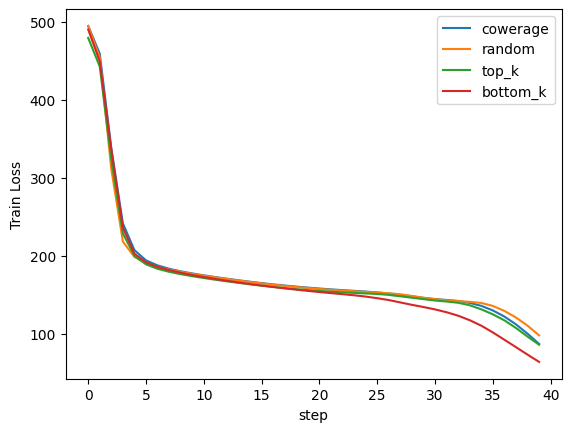

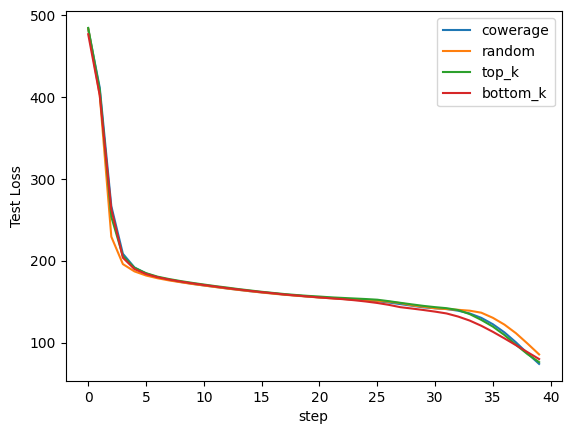

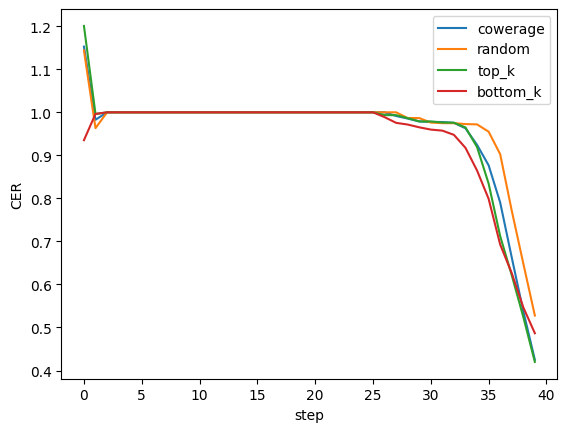

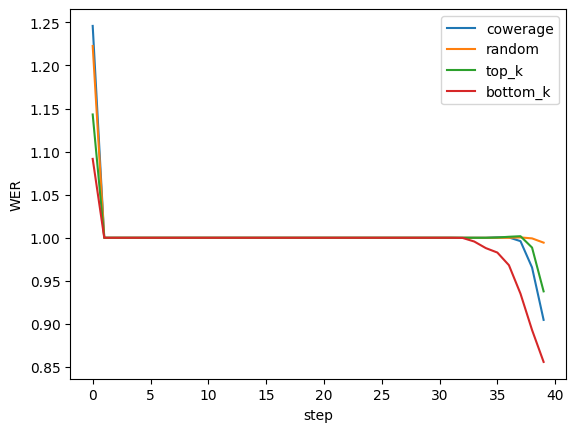

In [45]:
# plot
for metrics_key in metrics_keys:
    fig, ax = plt.subplots()
    for selection_method in ["cowerage", "random", "top_k", "bottom_k"]:
        ax.plot(metrics_values[selection_method][metrics_key], label=selection_method)
    ax.set_xlabel("step")
    ax.set_ylabel(metrics_key)
    ax.legend()
    plt.show()
    SAVE_DIR = f"figs/{EXPERIMENT_NAME}/"
    os.makedirs(SAVE_DIR, exist_ok=True)
    fig.savefig(f"{SAVE_DIR}/{metrics_key}.png")